In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2  # Import L2 regularization
import pandas as pd
# Load the dataset
Data = pd.read_csv('DualBypass.csv')

In [2]:
Data.head()

,BPR1,BPR2,PR_HPC,PR_IPC,PR_LPC,TIT,TSCOR,TSF,TSFC,TSNoxR,SFC
0,0.2059,0.2059,5.891,4.540,4.202,2021,0.03402,118.5,99.97,0.1805,0.1200
1,0.2058,0.2058,5.890,4.539,4.201,2021,0.03397,118.9,99.71,0.1800,0.1196
2,0.0500,0.5707,8.253,2.000,7.505,2194,0.02799,124.8,99.94,0.1795,0.1199
3,0.2058,0.2058,5.888,4.538,4.201,2021,0.03392,119.2,99.44,0.1795,0.1193
4,0.2057,0.2057,5.887,4.537,4.200,2021,0.03387,119.6,99.18,0.1791,0.1190


In [3]:
import numpy as np

# Assuming Data is your dataset

# Generate synthetic data with 50 points
X = Data[['BPR1', 'BPR2', 'PR_HPC', 'PR_IPC', 'PR_LPC', 'TIT']].values

# Filter out bad data for TSFC, TSNoxR, and SFC
mask = np.all(np.isfinite(Data[['TSFC', 'TSNoxR', 'SFC']].values), axis=1)
y = Data[mask][['TSCOR', 'TSF', 'TSFC', 'TSNoxR', 'SFC']].values

In [4]:

# Clean X by removing rows with bad data
X = X[mask]

# Clean y by removing rows with bad data
y = y[mask]

In [5]:

# Normalize the input and output variables
scaler_x = StandardScaler()
inputs_norm = scaler_x.fit_transform(X)
scaler_y = StandardScaler()
outputs_norm = scaler_y.fit_transform(y)



In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(inputs_norm, outputs_norm, test_size=0.2, random_state=20)


In [7]:

from keras.optimizers import Adam
#500 300 200 epoch=100 #random state 20

# Define the Multi-Output MLP Regressor model with Dropout and L2 regularization
model_regularized_dropout = Sequential()
model_regularized_dropout.add(Dense(100
                                    ,input_dim=X.shape[1], activation='relu'))  # LSM
#odel_regularized_dropout.add(Dropout(0.1))  # LSM
model_regularized_dropout.add(Dense(100
                                    , activation='relu'))  # LSM
#odel_regularized_dropout.add(Dropout(0.1))  # LSM
model_regularized_dropout.add(Dense(100
                                    ,activation='relu'))  # LSM

model_regularized_dropout.add(Dense(5))  # Output layer with 2 units for two target variables


D:\anaconda-3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:

# Compile the model with mean squared error loss and Adam optimizer with custom learning rate
adam = Adam(learning_rate=1e-4)

model_regularized_dropout.compile(loss='mean_squared_error', optimizer=adam)

# Train the model with Dropout and L2 regularization
model_regularized_dropout.fit(X_train, y_train, epochs=100,
                              batch_size=32, verbose=1)

Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.8894
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4773
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2967
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2434
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1894
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1568
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1228
Epoch 8/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1133
Epoch 9/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1046
Epoch 10/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1000
Epoch 11/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0837
Epoch 12/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0751
Epoch 13/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0626
Epoch 14/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0625
Epoch 15/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0547
Epoc

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.8294e-04
Epoch 82/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.1811e-04
Epoch 83/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.9706e-04
Epoch 84/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.1762e-04
Epoch 85/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.9861e-04
Epoch 86/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.3591e-04
Epoch 87/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.6695e-04
Epoch 88/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.6909e-04
Epoch 89/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.5714e-04
Epoch 90/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.4053e-04
Epoch 91/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0010
Epoch 92/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.8181e-04
Epoch 93/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.4992e-04
Epoch 94/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.5411e-04
Epoch 95/100
88/88 ━━━━

110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


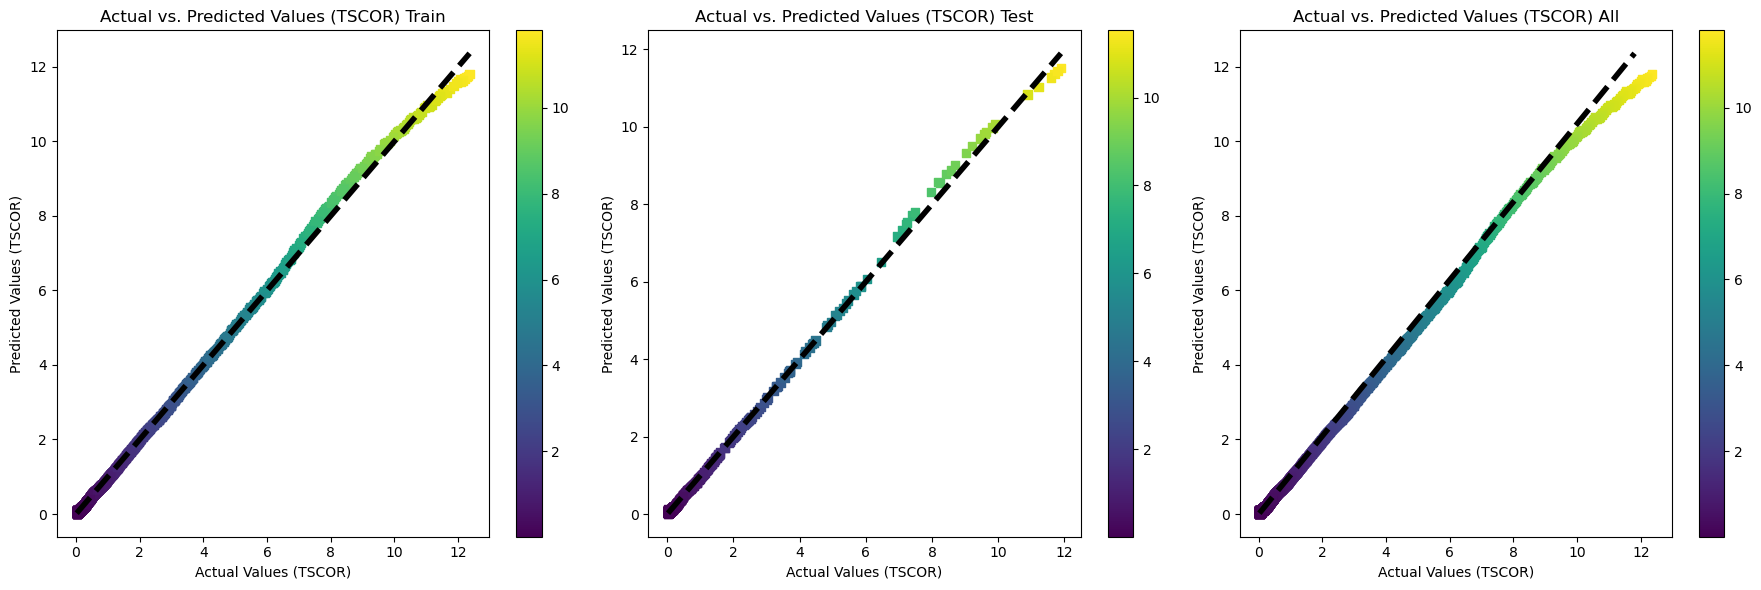

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
# Predict on the full dataset with the updated model
y_pred = model_regularized_dropout.predict(inputs_norm)

# Inverse transform the predicted values to get the original scale for filtered data
# Make predictions on the training and test data
y_pred_train = scaler_y.inverse_transform(model_regularized_dropout.predict(X_train))
y_pred_test = scaler_y.inverse_transform(model_regularized_dropout.predict(X_test))
y_pred_all =scaler_y.inverse_transform(y_pred) 


y_train=scaler_y.inverse_transform(y_train)
y_test=scaler_y.inverse_transform(y_test)

# Calculate the mean squared error of the predictions for both train and test sets

# Visualize the scatter plot for both train, test, and all data sets with the first target variable
plt.figure(figsize=(18, 6))

# Plot for training set
plt.subplot(1, 3, 1)
plt.scatter(y_train[:, 0], y_pred_train[:, 0], c=y_pred_train[:, 0], cmap='viridis', marker='s')
plt.plot([y_train[:, 0].min(), y_train[:, 0].max()], [y_train[:, 0].min(), y_train[:, 0].max()], 'k--', lw=4)
plt.xlabel('Actual Values (TSCOR)')
plt.ylabel('Predicted Values (TSCOR)')
plt.title('Actual vs. Predicted Values (TSCOR) Train')
plt.colorbar()

# Plot for testing set
plt.subplot(1, 3, 2)
plt.scatter(y_test[:, 0], y_pred_test[:, 0], c=y_pred_test[:, 0], cmap='viridis', marker='s')
plt.plot([y_test[:, 0].min(), y_test[:, 0].max()], [y_test[:, 0].min(), y_test[:, 0].max()], 'k--', lw=4)
plt.xlabel('Actual Values (TSCOR)')
plt.ylabel('Predicted Values (TSCOR)')
plt.title('Actual vs. Predicted Values (TSCOR) Test')
plt.colorbar()

# Plot for all data
plt.subplot(1, 3, 3)
plt.scatter(y[:, 0], y_pred_all[:, 0], c=y_pred_all[:, 0], cmap='viridis', marker='s')
plt.plot([y[:, 0].min(), y_pred_all[:, 0].max()], [y[:, 0].min(), y[:, 0].max()], 'k--', lw=4)
plt.xlabel('Actual Values (TSCOR)')
plt.ylabel('Predicted Values (TSCOR)')
plt.title('Actual vs. Predicted Values (TSCOR) All')
plt.colorbar()

plt.tight_layout()
plt.show()

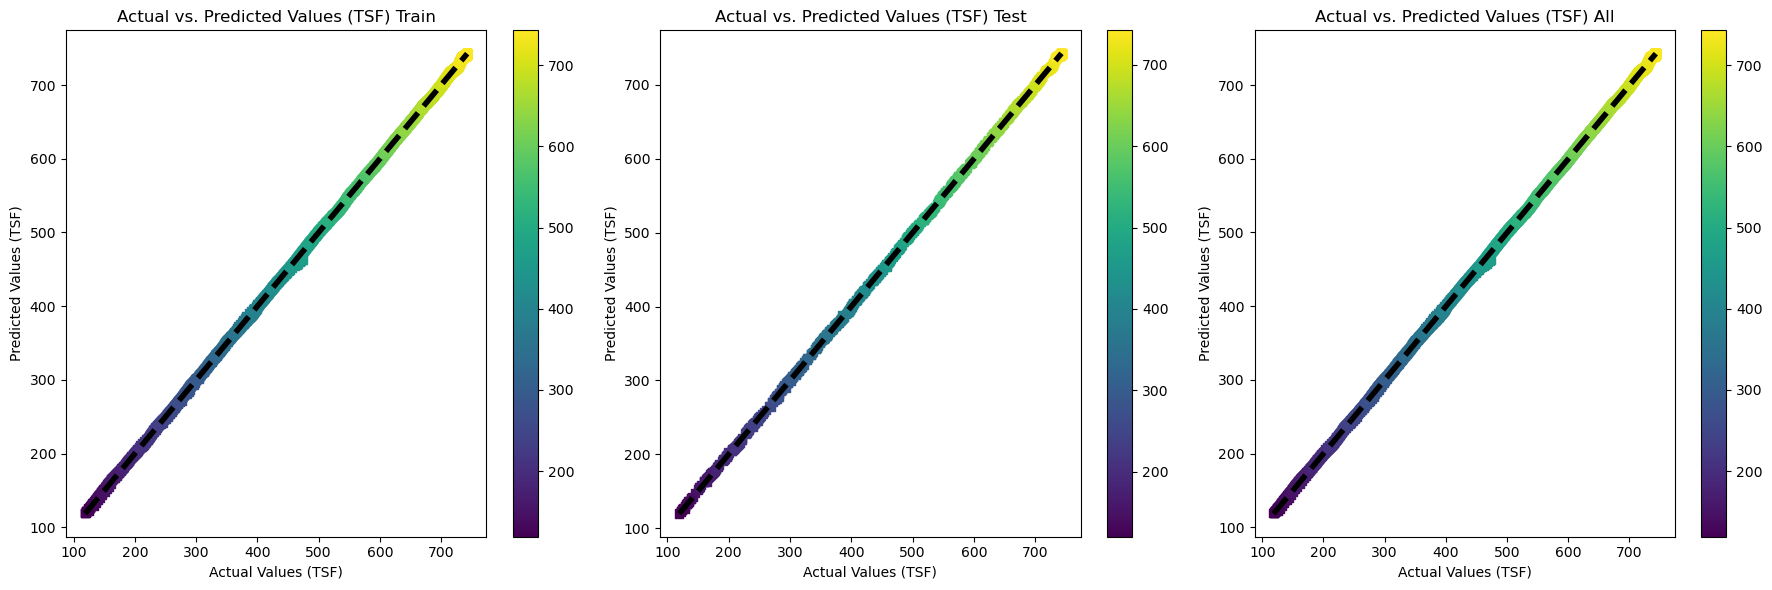

In [10]:
# Visualize the scatter plot for both train, test, and all data sets with the first target variable
plt.figure(figsize=(18, 6))

# Plot for training set
plt.subplot(1, 3, 1)
plt.scatter(y_train[:, 1], y_pred_train[:, 1], c=y_pred_train[:, 1], cmap='viridis', marker='s')
plt.plot([y_train[:, 1].min(), y_train[:, 1].max()], [y_train[:, 1].min(), y_train[:, 1].max()], 'k--', lw=4)
plt.xlabel('Actual Values (TSF)')
plt.ylabel('Predicted Values (TSF)')
plt.title('Actual vs. Predicted Values (TSF) Train')
plt.colorbar()

# Plot for testing set
plt.subplot(1, 3, 2)
plt.scatter(y_test[:, 1], y_pred_test[:, 1], c=y_pred_test[:, 1], cmap='viridis', marker='s')
plt.plot([y_test[:, 1].min(), y_test[:, 1].max()], [y_test[:, 1].min(), y_test[:, 1].max()], 'k--', lw=4)
plt.xlabel('Actual Values (TSF)')
plt.ylabel('Predicted Values (TSF)')
plt.title('Actual vs. Predicted Values (TSF) Test')
plt.colorbar()

# Plot for all data
plt.subplot(1, 3, 3)
plt.scatter(y[:, 1], y_pred_all[:, 1], c=y_pred_all[:, 1], cmap='viridis', marker='s')
plt.plot([y[:, 1].min(), y_pred_all[:, 1].max()], [y[:, 1].min(), y[:, 1].max()], 'k--', lw=4)
plt.xlabel('Actual Values (TSF)')
plt.ylabel('Predicted Values (TSF)')
plt.title('Actual vs. Predicted Values (TSF) All')
plt.colorbar()

plt.tight_layout()
plt.show()

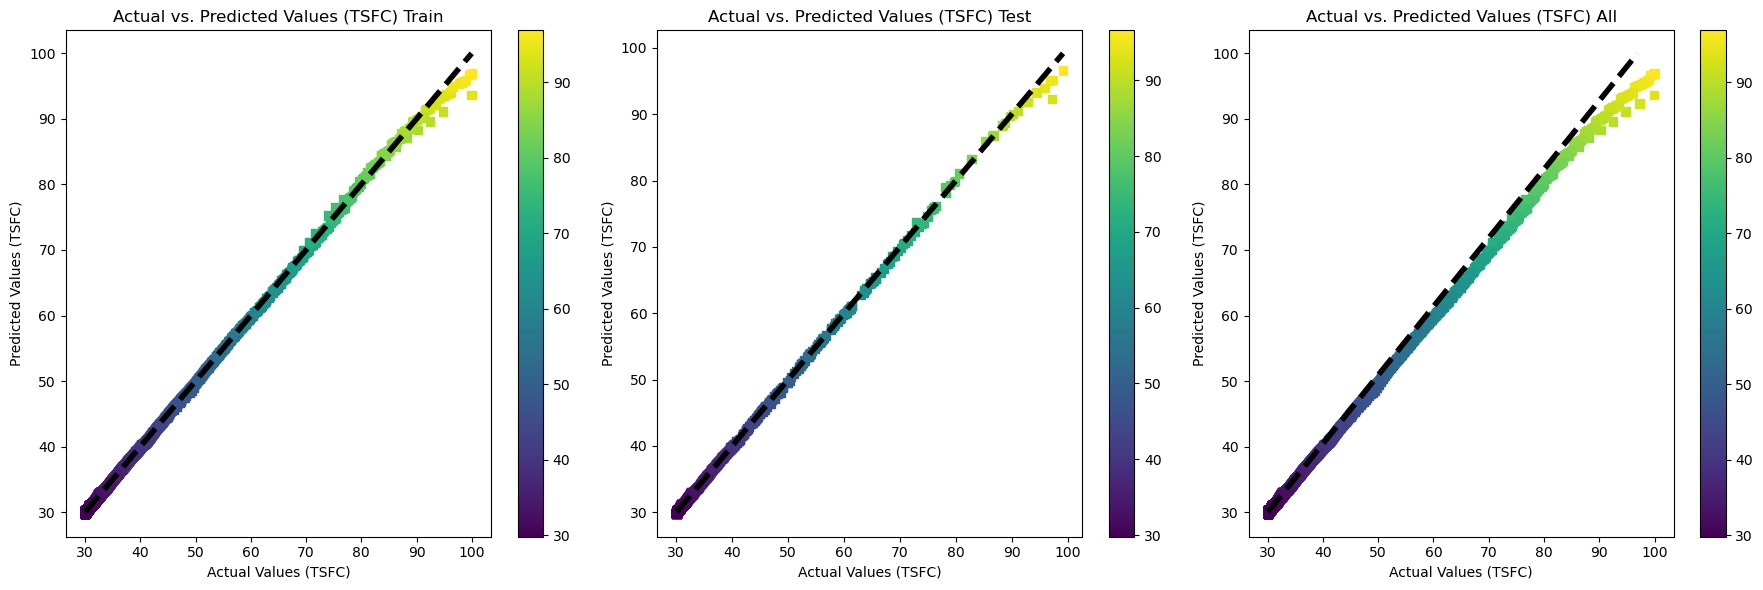

In [11]:
# Visualize the scatter plot for both train, test, and all data sets with the first target variable
plt.figure(figsize=(18, 6))

# Plot for training set
plt.subplot(1, 3, 1)
plt.scatter(y_train[:, 2], y_pred_train[:, 2], c=y_pred_train[:, 2], cmap='viridis', marker='s')
plt.plot([y_train[:, 2].min(), y_train[:, 2].max()], [y_train[:, 2].min(), y_train[:, 2].max()], 'k--', lw=4)
plt.xlabel('Actual Values (TSFC)')
plt.ylabel('Predicted Values (TSFC)')
plt.title('Actual vs. Predicted Values (TSFC) Train')
plt.colorbar()

# Plot for testing set
plt.subplot(1, 3, 2)
plt.scatter(y_test[:, 2], y_pred_test[:, 2], c=y_pred_test[:, 2], cmap='viridis', marker='s')
plt.plot([y_test[:, 2].min(), y_test[:, 2].max()], [y_test[:, 2].min(), y_test[:, 2].max()], 'k--', lw=4)
plt.xlabel('Actual Values (TSFC)')
plt.ylabel('Predicted Values (TSFC)')
plt.title('Actual vs. Predicted Values (TSFC) Test')
plt.colorbar()

# Plot for all data
plt.subplot(1, 3, 3)
plt.scatter(y[:, 2], y_pred_all[:, 2], c=y_pred_all[:, 2], cmap='viridis', marker='s')
plt.plot([y[:, 2].min(), y_pred_all[:, 2].max()], [y[:, 2].min(), y[:, 2].max()], 'k--', lw=4)
plt.xlabel('Actual Values (TSFC)')
plt.ylabel('Predicted Values (TSFC)')
plt.title('Actual vs. Predicted Values (TSFC) All')
plt.colorbar()

plt.tight_layout()
plt.show()

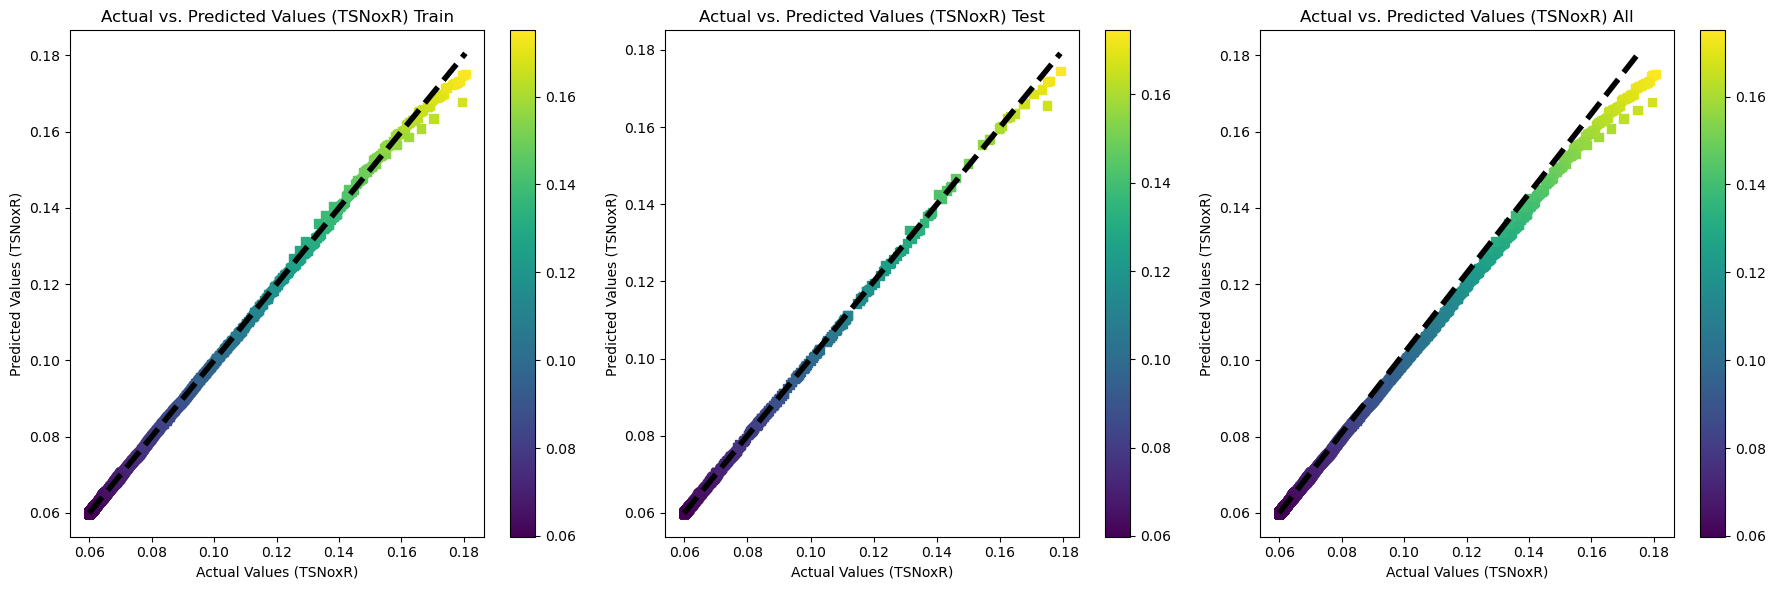

In [12]:
# Visualize the scatter plot for both train, test, and all data sets with the first target variable
plt.figure(figsize=(18, 6))

# Plot for training set
plt.subplot(1, 3, 1)
plt.scatter(y_train[:, 3], y_pred_train[:, 3], c=y_pred_train[:, 3], cmap='viridis', marker='s')
plt.plot([y_train[:, 3].min(), y_train[:, 3].max()], [y_train[:, 3].min(), y_train[:, 3].max()], 'k--', lw=4)
plt.xlabel('Actual Values (TSNoxR)')
plt.ylabel('Predicted Values (TSNoxR)')
plt.title('Actual vs. Predicted Values (TSNoxR) Train')
plt.colorbar()

# Plot for testing set
plt.subplot(1, 3, 2)
plt.scatter(y_test[:, 3], y_pred_test[:, 3], c=y_pred_test[:, 3], cmap='viridis', marker='s')
plt.plot([y_test[:, 3].min(), y_test[:, 3].max()], [y_test[:, 3].min(), y_test[:, 3].max()], 'k--', lw=4)
plt.xlabel('Actual Values (TSNoxR)')
plt.ylabel('Predicted Values (TSNoxR)')
plt.title('Actual vs. Predicted Values (TSNoxR) Test')
plt.colorbar()

# Plot for all data
plt.subplot(1, 3, 3)
plt.scatter(y[:, 3], y_pred_all[:, 3], c=y_pred_all[:, 3], cmap='viridis', marker='s')
plt.plot([y[:, 3].min(), y_pred_all[:, 3].max()], [y[:, 3].min(), y[:, 3].max()], 'k--', lw=4)
plt.xlabel('Actual Values (TSNoxR)')
plt.ylabel('Predicted Values (TSNoxR)')
plt.title('Actual vs. Predicted Values (TSNoxR) All')
plt.colorbar()

plt.tight_layout()
plt.show()

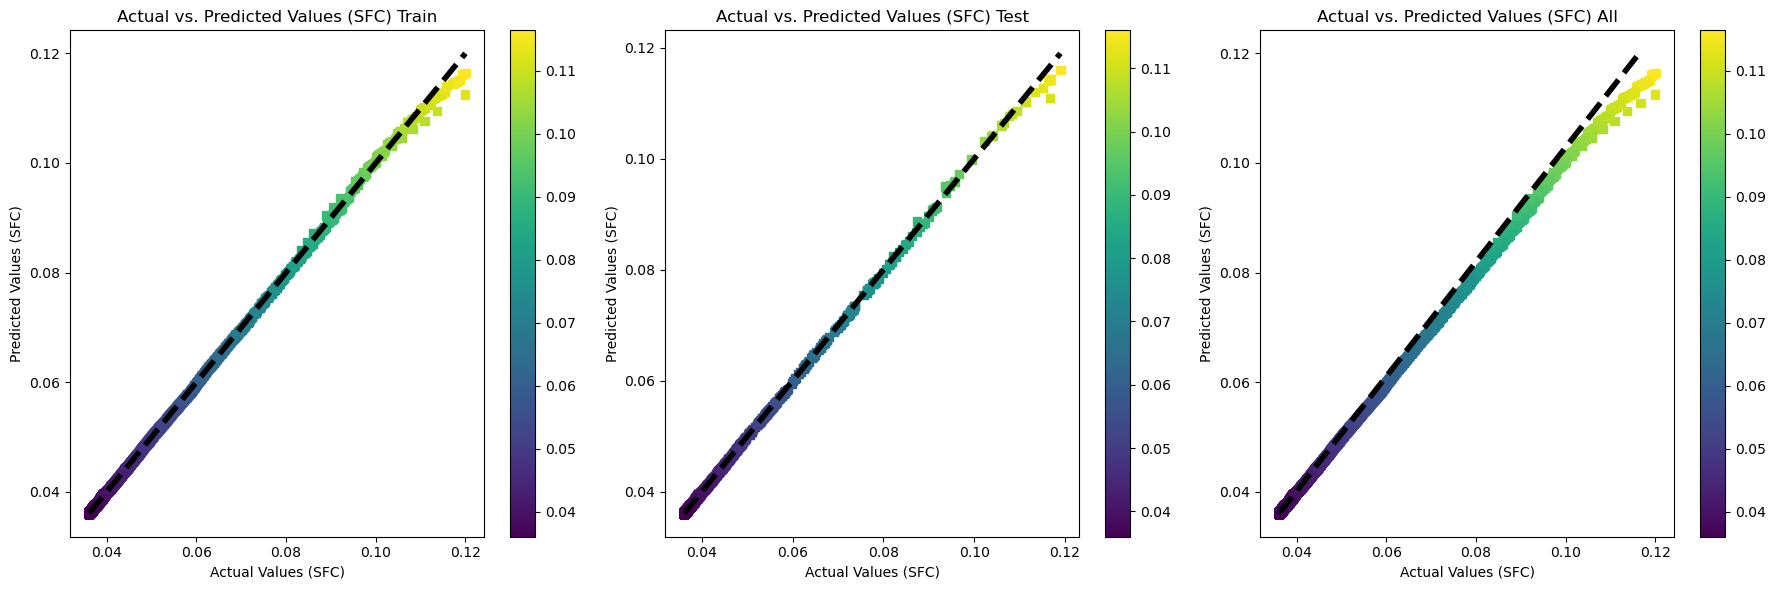

In [13]:
# Visualize the scatter plot for both train, test, and all data sets with the first target variable
plt.figure(figsize=(18, 6))
#y = Data[['TSCOR','TSF','TSFC','','']].values

# Plot for training set
plt.subplot(1, 3, 1)
plt.scatter(y_train[:, 4], y_pred_train[:, 4], c=y_pred_train[:, 4], cmap='viridis', marker='s')
plt.plot([y_train[:, 4].min(), y_train[:, 4].max()], [y_train[:, 4].min(), y_train[:, 4].max()], 'k--', lw=4)
plt.xlabel('Actual Values (SFC)')
plt.ylabel('Predicted Values (SFC)')
plt.title('Actual vs. Predicted Values (SFC) Train')
plt.colorbar()

# Plot for testing set
plt.subplot(1, 3, 2)
plt.scatter(y_test[:, 4], y_pred_test[:, 4], c=y_pred_test[:, 4], cmap='viridis', marker='s')
plt.plot([y_test[:, 4].min(), y_test[:, 4].max()], [y_test[:, 4].min(), y_test[:, 4].max()], 'k--', lw=4)
plt.xlabel('Actual Values (SFC)')
plt.ylabel('Predicted Values (SFC)')
plt.title('Actual vs. Predicted Values (SFC) Test')
plt.colorbar()

# Plot for all data
plt.subplot(1, 3, 3)
plt.scatter(y[:, 4], y_pred_all[:, 4], c=y_pred_all[:, 4], cmap='viridis', marker='s')
plt.plot([y[:, 4].min(), y_pred_all[:, 4].max()], [y[:, 4].min(), y[:, 4].max()], 'k--', lw=4)
plt.xlabel('Actual Values (SFC)')
plt.ylabel('Predicted Values (SFC)')
plt.title('Actual vs. Predicted Values (SFC) All')
plt.colorbar()

plt.tight_layout()
plt.show()

In [14]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [15]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Calculate metrics on the test set
r2 = r2_score(y_test[:, 0], y_pred_test[:, 0])
mse = mean_squared_error(y_test[:, 0], y_pred_test[:, 0])
rmse = mean_squared_error(y_test[:, 0], y_pred_test[:, 0], squared=False)
mae = mean_absolute_error(y_test[:, 0], y_pred_test[:, 0])

print("Test Set Metrics:")
print("R2 Score: (TSCOR)", r2)
print("Mean Squared Error: (TSCOR)", mse)
print("Root Mean Squared Error:(TSCOR)", rmse)
print("Mean Absolute Error:(TSCOR)", mae)

# Calculate metrics on the training set
r2_train = r2_score(y_train[:, 0], y_pred_train[:, 0])
mse_train = mean_squared_error(y_train[:, 0], y_pred_train[:, 0])
rmse_train = mean_squared_error(y_train[:, 0], y_pred_train[:, 0], squared=False)
mae_train = mean_absolute_error(y_train[:, 0], y_pred_train[:, 0])

print("\nTrain Set Metrics:")
print("R2 Score: (TSCOR)", r2_train)
print("Mean Squared Error: (TSCOR)", mse_train)
print("Root Mean Squared Error: (TSCOR)", rmse_train)
print("Mean Absolute Error:(TSCOR)", mae_train)



Test Set Metrics:
R2 Score: (TSCOR) 0.999046489855662
Mean Squared Error: (TSCOR) 0.003624727460881622
Root Mean Squared Error:(TSCOR) 0.06020570953723261
Mean Absolute Error:(TSCOR) 0.03033604966595408

Train Set Metrics:
R2 Score: (TSCOR) 0.9991374248912447
Mean Squared Error: (TSCOR) 0.00415457517795408
Root Mean Squared Error: (TSCOR) 0.06445599411966338
Mean Absolute Error:(TSCOR) 0.031364436568723016


In [16]:

# Calculate metrics on the test set
r2 = r2_score(y_test[:, 1], y_pred_test[:, 1])
mse = mean_squared_error(y_test[:, 1], y_pred_test[:, 1])
rmse = mean_squared_error(y_test[:, 1], y_pred_test[:, 1], squared=False)
mae = mean_absolute_error(y_test[:, 1], y_pred_test[:, 1])

print("Test Set Metrics:")
print("R2 Score: (TSF)", r2)
print("Mean Squared Error: (TSF)", mse)
print("Root Mean Squared Error:(TSF)", rmse)
print("Mean Absolute Error:(TSF)", mae)

# Calculate metrics on the training set
r2_train = r2_score(y_train[:, 1], y_pred_train[:, 1])
mse_train = mean_squared_error(y_train[:, 1], y_pred_train[:, 1])
rmse_train = mean_squared_error(y_train[:, 1], y_pred_train[:, 1], squared=False)
mae_train = mean_absolute_error(y_train[:, 1], y_pred_train[:, 1])

print("\nTrain Set Metrics:")
print("R2 Score: (TSF)", r2_train)
print("Mean Squared Error: (TSF)", mse_train)
print("Root Mean Squared Error: (TSF)", rmse_train)
print("Mean Absolute Error:(TSF)", mae_train)

Test Set Metrics:
R2 Score: (TSF) 0.9999606198061828
Mean Squared Error: (TSF) 1.3794667590299645
Root Mean Squared Error:(TSF) 1.1745070280887913
Mean Absolute Error:(TSF) 0.931738633878222

Train Set Metrics:
R2 Score: (TSF) 0.9999572835459761
Mean Squared Error: (TSF) 1.5076533075773142
Root Mean Squared Error: (TSF) 1.2278653458654634
Mean Absolute Error:(TSF) 0.9411313097107673


In [17]:

# Calculate metrics on the test set
r2 = r2_score(y_test[:, 3], y_pred_test[:, 3])
mse = mean_squared_error(y_test[:, 3], y_pred_test[:, 3])
rmse = mean_squared_error(y_test[:, 3], y_pred_test[:, 3], squared=False)
mae = mean_absolute_error(y_test[:, 3], y_pred_test[:, 3])

print("Test Set Metrics:")
print("R2 Score: (TSNoxR)", r2)
print("Mean Squared Error: (TSNoxR)", mse)
print("Root Mean Squared Error:(TSNoxR)", rmse)
print("Mean Absolute Error:(TSNoxR)", mae)

# Calculate metrics on the training set
r2_train = r2_score(y_train[:, 3], y_pred_train[:, 3])
mse_train = mean_squared_error(y_train[:, 3], y_pred_train[:, 3])
rmse_train = mean_squared_error(y_train[:, 3], y_pred_train[:, 3], squared=False)
mae_train = mean_absolute_error(y_train[:, 3], y_pred_train[:, 3])

print("\nTrain Set Metrics:")
print("R2 Score: (TSNoxR)", r2_train)
print("Mean Squared Error: (TSNoxR)", mse_train)
print("Root Mean Squared Error: (TSNoxR)", rmse_train)
print("Mean Absolute Error:(TSNoxR)", mae_train)

Test Set Metrics:
R2 Score: (TSNoxR) 0.9994506047768686
Mean Squared Error: (TSNoxR) 3.134012411198091e-07
Root Mean Squared Error:(TSNoxR) 0.0005598225085862564
Mean Absolute Error:(TSNoxR) 0.00022591402757524942

Train Set Metrics:
R2 Score: (TSNoxR) 0.9994868969426324
Mean Squared Error: (TSNoxR) 2.7466961265135116e-07
Root Mean Squared Error: (TSNoxR) 0.0005240893174367811
Mean Absolute Error:(TSNoxR) 0.00022169684136364825


In [18]:

# Calculate metrics on the test set
r2 = r2_score(y_test[:, 4], y_pred_test[:, 4])
mse = mean_squared_error(y_test[:, 4], y_pred_test[:, 4])
rmse = mean_squared_error(y_test[:, 4], y_pred_test[:, 4], squared=False)
mae = mean_absolute_error(y_test[:, 4], y_pred_test[:, 4])

print("Test Set Metrics:")
print("R2 Score: (TSFCC)", r2)
print("Mean Squared Error: (TSFCC)", mse)
print("Root Mean Squared Error:(TSFCC)", rmse)
print("Mean Absolute Error:(TSFCC)", mae)

# Calculate metrics on the training set
r2_train = r2_score(y_train[:, 4], y_pred_train[:, 4])
mse_train = mean_squared_error(y_train[:, 4], y_pred_train[:, 4])
rmse_train = mean_squared_error(y_train[:, 4], y_pred_train[:, 4], squared=False)
mae_train = mean_absolute_error(y_train[:, 4], y_pred_train[:, 4])

print("\nTrain Set Metrics:")
print("R2 Score: (TSFCC)", r2_train)
print("Mean Squared Error: (TSFCC)", mse_train)
print("Root Mean Squared Error: (TSFCC)", rmse_train)
print("Mean Absolute Error:(TSFCC)", mae_train)



Test Set Metrics:
R2 Score: (TSFCC) 0.999570741055402
Mean Squared Error: (TSFCC) 1.2470644804752277e-07
Root Mean Squared Error:(TSFCC) 0.0003531380014208649
Mean Absolute Error:(TSFCC) 0.00013847355477309938

Train Set Metrics:
R2 Score: (TSFCC) 0.9995929246397574
Mean Squared Error: (TSFCC) 1.1172010441569368e-07
Root Mean Squared Error: (TSFCC) 0.0003342455750128843
Mean Absolute Error:(TSFCC) 0.00013622331153444525


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

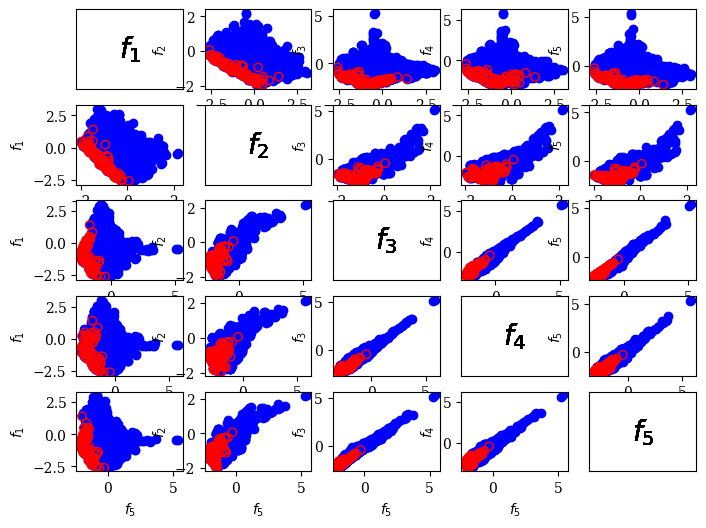

In [19]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.core.evaluator import Evaluator
from pymoo.core.problem import Problem
from pymoo.core.termination import NoTermination
from pymoo.visualization.scatter import Scatter
from pymoo.problems.static import StaticProblem


# Define the multi-objective function using the trained neural network
def multi_objective_function(x):
    inputs_test_norm = scaler_x.transform(np.array(x).reshape(1, -1))
    #y_pred = scaler_y.inverse_transform(model_regularized_dropout.predict(inputs_test_norm))
    y_pred = model_regularized_dropout.predict(inputs_test_norm)
    return (y_pred[0, 0], -y_pred[0, 1],y_pred[0, 2],y_pred[0, 3],y_pred[0, 4])

problem = Problem(n_var=6, n_obj=5, n_constr=0, xl=[0.01, 0.01, 1.5, 1.5, 1.5, 1600], xu=[0.3,0.3,8, 3.5, 7, 2175])

# Create the algorithm object
algorithm = NSGA2(pop_size=100)

# Let the algorithm object never terminate and let the loop control it
termination = NoTermination()

# Create an algorithm object that never terminates
algorithm.setup(problem, termination=termination)

# Fix the random seed manually
np.random.seed(1)

# Initialize plot
plot = Scatter()

# Until the algorithm has not terminated
for n_gen in range(10):
    # Ask the algorithm for the next solution to be evaluated
    pop = algorithm.ask()

    # Get the design space values of the algorithm
    X = pop.get("X")

    # Evaluate objectives using the multi-objective function
    F = np.array([multi_objective_function(x) for x in X])
    static = StaticProblem(problem, F=F)
    Evaluator().eval(static, pop)

    # Returned the evaluated individuals which have been evaluated or even modified
    algorithm.tell(infills=pop)

    # Update plot with current generation
    plot.add(pop.get("F"), color="blue")

# Add Pareto front to plot
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)

# Obtain the result objective from the algorithm
res = algorithm.result()

# Calculate a hash to show that all executions end with the same result
print("hash", res.F.sum())

# Retrieve the optimal inputs from the optimization result
optimal_inputs = res.X
print("Optimal Inputs:")
for input_values in optimal_inputs:
    print(input_values)

# Add final result to plot
plot.add(res.F, facecolor="none", edgecolor="red")

# Show plot
plot.show()


In [25]:

# Add Pareto front to plot
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)

for input_values in optimal_inputs:
    print(input_values)

# Add final result to plot
plot.add(res.F, facecolor="none", edgecolor="red")

# Show plot
plot.show()

[2.99336901e-01 1.59465891e-02 1.71035788e+00 3.35402821e+00
 1.80634742e+00 1.60018988e+03]
[1.93216089e-01 1.24009862e-02 1.53003037e+00 1.62706640e+00
 2.68054099e+00 1.60324755e+03]
[5.85008464e-02 1.02523498e-02 1.59667330e+00 3.47669991e+00
 4.68193570e+00 1.60116041e+03]
[1.79222563e-01 1.43684120e-02 1.55752486e+00 3.33317303e+00
 2.10885180e+00 1.61531155e+03]
[2.58290075e-01 1.70503648e-02 1.71751745e+00 3.34708772e+00
 1.52526209e+00 1.61282920e+03]
[2.03719329e-01 1.92268121e-01 4.65015207e+00 3.31333120e+00
 1.57841251e+00 1.60129623e+03]
[2.03719329e-01 1.87742876e-01 2.99823104e+00 3.31333120e+00
 1.53729814e+00 1.60129623e+03]
[2.15652539e-01 3.81074116e-02 4.61620455e+00 1.66020819e+00
 1.56653229e+00 1.60100990e+03]
[5.85008464e-02 1.00596746e-02 1.59667330e+00 2.55104379e+00
 3.15267685e+00 1.60722028e+03]
[2.47185191e-01 8.42581185e-02 4.47641465e+00 3.34542696e+00
 1.74749238e+00 1.60215259e+03]
[1.76771373e-01 3.19325054e-02 4.72259669e+00 2.78938731e+00
 1.577486

In [20]:
import pandas as pd

# Assuming res.F contains the optimal outputs and res.X contains the optimal inputs
optimal_inputs = res.X
optimal_outputs = scaler_y.inverse_transform(np.abs(res.F)) 
df_optimal_inputs = pd.DataFrame(optimal_inputs, columns=['BPR1', 'BPR2', 'PR_HPC', 'PR_IPC', 'PR_LPC', 'TIT'])
df_optimal_outputs = pd.DataFrame(optimal_outputs, columns=['TSCOR', 'TSF', 'TSFC', 'TSNoxR', 'SFC'])
Optimaldata=pd.concat([df_optimal_inputs,df_optimal_outputs],axis=1)

# Write the combined optimal data to an Excel file
Optimaldata.to_excel("Optimalsbypass.xlsx") 



In [21]:
res.F

array([[-1.0181042 , -0.79089111, -2.25662112, -3.06384063, -1.97712374],
       [ 0.46079493, -1.97202563, -1.57759988, -2.07828403, -1.44816661],
       [ 1.41277134, -1.4678539 , -1.63173282, -2.04010057, -1.96996784],
       [-0.3556717 , -1.45764685, -2.18029666, -2.46936679, -2.03394079],
       [-1.17797768, -0.98625904, -2.29663777, -2.83547497, -1.97326458],
       [-2.59476399,  0.06663872, -0.43275285, -0.44208744, -0.27019212],
       [-2.58893538, -0.24613862, -0.79163146, -0.99629104, -0.62624592],
       [-1.35555911, -1.10133648, -0.86271578, -1.14177752, -0.74459219],
       [ 0.86846888, -1.69183624, -1.43217969, -1.53846288, -1.62054491],
       [-2.52917552, -0.22927056, -1.0912596 , -1.34278655, -0.84808582],
       [-1.89248502, -0.69111973, -1.1322664 , -1.25141847, -1.00529313],
       [-1.51116359, -0.99428618, -0.94079924, -1.48470056, -0.79434776],
       [-2.16359329, -0.36325595, -1.50963438, -1.90996265, -1.24984586],
       [-1.30466938, -1.19157791, -1.5

In [22]:
model_regularized_dropout.predict(scaler_x.transform(optimal_inputs))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[-1.0181036 ,  0.79089063, -2.2566214 , -3.063841  , -1.9771235 ],
       [ 0.46079502,  1.9720256 , -1.5776    , -2.078284  , -1.448166  ],
       [ 1.4127717 ,  1.4678539 , -1.6317334 , -2.0401013 , -1.9699684 ],
       [-0.3556712 ,  1.457647  , -2.1802971 , -2.4693668 , -2.033941  ],
       [-1.177978  ,  0.9862588 , -2.2966385 , -2.8354747 , -1.9732649 ],
       [-2.594764  , -0.06663839, -0.432753  , -0.44208735, -0.27019244],
       [-2.5889354 ,  0.24613865, -0.79163086, -0.996291  , -0.6262461 ],
       [-1.3555591 ,  1.1013365 , -0.86271584, -1.1417776 , -0.7445921 ],
       [ 0.8684687 ,  1.6918361 , -1.4321797 , -1.5384624 , -1.6205448 ],
       [-2.529175  ,  0.22927053, -1.0912596 , -1.3427864 , -0.8480853 ],
       [-1.8924848 ,  0.69111973, -1.1322665 , -1.251418  , -1.0052934 ],
       [-1.5111636 ,  0.9942861 , -0.9407995 , -1.4847008 , -0.79434776],
       [-2.1635933 ,  0.36325607, -1.5096347 , -1.9099634 , -1.2498466 ],
       [-1.304669  ,  1.1915779 , -1.5

In [23]:
optimal_inputs

array([[2.99336901e-01, 1.59465891e-02, 1.71035788e+00, 3.35402821e+00,
        1.80634742e+00, 1.60018988e+03],
       [1.93216089e-01, 1.24009862e-02, 1.53003037e+00, 1.62706640e+00,
        2.68054099e+00, 1.60324755e+03],
       [5.85008464e-02, 1.02523498e-02, 1.59667330e+00, 3.47669991e+00,
        4.68193570e+00, 1.60116041e+03],
       [1.79222563e-01, 1.43684120e-02, 1.55752486e+00, 3.33317303e+00,
        2.10885180e+00, 1.61531155e+03],
       [2.58290075e-01, 1.70503648e-02, 1.71751745e+00, 3.34708772e+00,
        1.52526209e+00, 1.61282920e+03],
       [2.03719329e-01, 1.92268121e-01, 4.65015207e+00, 3.31333120e+00,
        1.57841251e+00, 1.60129623e+03],
       [2.03719329e-01, 1.87742876e-01, 2.99823104e+00, 3.31333120e+00,
        1.53729814e+00, 1.60129623e+03],
       [2.15652539e-01, 3.81074116e-02, 4.61620455e+00, 1.66020819e+00,
        1.56653229e+00, 1.60100990e+03],
       [5.85008464e-02, 1.00596746e-02, 1.59667330e+00, 2.55104379e+00,
        3.15267685e+00, 